<center><span style="font-weight:700;font-size:35px">Егоров Алексей</span></center>

<center><span style="font-weight:700;font-size:20px">Задание 1</span></center>

In [126]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [127]:
#импортируем необходимые данные
df = pd.read_csv('names.csv')

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
#разделим выборку на обучающий набор и тестирование
X, y = df['name'], df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=35)


data_train = tuple((x, y) for x, y in zip(X_train, y_train))
data_test = [(x, y) for x, y in zip(X_test, y_test)]

In [130]:
from collections import defaultdict
from math import log
from string import ascii_lowercase

In [131]:
def create_freq():
    '''
        Функция create_freq() создаёт словарь, ключами которого
        являются 2 списка: ['boy', буква], ['girl', буква], где буква - каждая из прописных букв английского алфавита,
        а значения = 0
    '''
    d = defaultdict(lambda:0)
    for letter in ascii_lowercase:
        d['boy', letter] = 0
        d['girl', letter] = 0
    return d

Первая модель представляет собой наивный байесовский классификатор, который размечает имена по полу, основываясь на последней букве имени

In [132]:

def train(samples):
    classes, freq = defaultdict(lambda:0), create_freq()
    for feats, label in samples:
        classes[label] += 1                 # count classes frequencies
        for feat in feats:
            freq[label, feat] += 1          # count features frequencies

    for label, feat in freq:                # normalize features frequencies
        freq[label, feat] /= classes[label]
    for c in classes:                       # normalize classes frequencies
        classes[c] /= len(samples)
    print(classes, freq)
    return classes, freq                    # return P(C) and P(O|C)

def classify(classifier, feats):
    classes, prob = classifier
    return min(classes.keys(),              # calculate argmin(-log(P(C|O))) -> argmax(P(C|O))
        key = lambda cl: float(-np.log(classes[cl])) + \
            sum(float(-np.log(prob.get((cl,feat)))) for feat in feats))

def get_features(sample): return (sample[-1]) # get last letter

# # samples = (("Anna", "F"), ("Michael", "M"), ("Jane", "F"), ("Ilya", "M"), ("Anthony", "M"))
samples = data_train
# features = [(get_features(feat), label) for feat, label in samples]
# classifier = train(features)
# classifier
# # features

# samples = (("Anna", "F"), ("Michael", "M"), ("Jane", "F"), ("Ilya", "M"), ("Anthony", "M"))
features = [(get_features(feat), label) for feat, label in samples]
classifier = train(features)

defaultdict(<function train.<locals>.<lambda> at 0x000001D6BD0D5800>, {'boy': 0.49984380423464075, 'girl': 0.5001561957653593}) defaultdict(<function create_freq.<locals>.<lambda> at 0x000001D6C3DDA340>, {('boy', 'a'): 0.01598324132263926, ('girl', 'a'): 0.3836704951594434, ('boy', 'b'): 0.003749869796187632, ('girl', 'b'): 0.00010409799090877546, ('boy', 'c'): 0.009050611668576323, ('girl', 'c'): 0.00024289531212047608, ('boy', 'd'): 0.07277525085934516, ('girl', 'd'): 0.007761083544420926, ('boy', 'e'): 0.13827066189831372, ('girl', 'e'): 0.3024856286940329, ('boy', 'f'): 0.003668854090714443, ('girl', 'f'): 0.0, ('boy', 'g'): 0.006041456893857852, ('girl', 'g'): 0.0005551892848468025, ('boy', 'h'): 0.02703609828362441, ('girl', 'h'): 0.025018217148409037, ('boy', 'i'): 0.005428052266703703, ('girl', 'i'): 0.02749343604335103, ('boy', 'j'): 8.101570547318959e-05, ('girl', 'j'): 0.0, ('boy', 'k'): 0.022985313009964932, ('girl', 'k'): 0.0009253154747446708, ('boy', 'l'): 0.082774903649

In [133]:
y_pred = [classify(classifier, get_features(el)) for el in X_test]

C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24064\4172654128.py:19: RuntimeWarning: divide by zero encountered in log
  sum(float(-np.log(prob.get((cl,feat)))) for feat in feats))


In [134]:
def mistake_matrix(y_pred, y_test):
    '''mistake_matrix(y_pred, y_test) - принимает список предсказанных значений и список тестовых значений для Задачи 1,
       возвращает матрицу ошибок классификации в виде списка
       Принимаемые значения: y_pred и y_test - списки одинаковой длины, элементами которых являются 'boy' или 'girl'
       Возвращаемое значение: список {'bb' : k, 'bg': l, 'gb' : m, 'gg': n}
       k - количество правильно определенных элементов класса "boy"
       l - количество элементов, определенных как "boy", но принадлежащих классу "girl"
       m - количество элементов, определенных как "girl", но принадлежащих классу "boy"
       n - количество правильно определенных элементов класса "girl"'''
    bb, bg = 0, 0 
    gb, gg = 0, 0
    for pr, tst in zip(y_pred, y_test):
        if tst == 'boy':
            if pr == 'boy':
                bb +=1
            else:
                bg +=1
        else:
            if pr == 'boy':
                gb +=1
            else:
                gg += 1
    return {'bb' : bb, 'bg': bg, 'gb' : gb, 'gg': gg}
    

In [124]:
def accuracy(mistake_matrix):
    '''
        Функция принимает матрицу ошибок и возвращает метрицу accuracy модели
        Принимаемое значение: матрица ошибок, полученную из функции mistake_matrix(y_pred, y_test)
        Возвращаемое значение: float или string при возникновении исключения ZeroDivisionError
    '''
    try:
        acc = (mistake_matrix['bb'] + mistake_matrix['gg']) / sum(mistake_matrix.values())
    except ZeroDivisionError:
        acc = 'Отсутствуют значения'
    finally:
        return acc
    
                                                                  
def precision(mistake_matrix):
    '''
        Функция принимает матрицу ошибок и возвращает метрицу precision модели для каждого класса
        Принимаемое значение: матрица ошибок, полученную из функции mistake_matrix(y_pred, y_test)
        Возвращаемое значение: (float, float) или string при возникновении исключения ZeroDivisionError
    '''
    try:
        pre_boy = mistake_matrix['bb'] / (mistake_matrix['bb'] + mistake_matrix['gb'])
    except ZeroDivisionError:
        pre_boy = "Предсказанные элементы класса 'boy' отсутствуют"
    
    try:
        pre_girl = mistake_matrix['gg'] / (mistake_matrix['gg'] + mistake_matrix['bg'])
    except ZeroDivisionError:
        pre_girl = "Предсказанные элементы класса 'girl' отсутствуют"

    finally:
        return pre_boy, pre_girl

    
def recall(mistake_matrix):
    '''
        Функция принимает матрицу ошибок и возвращает метрицу recall модели для каждого класса
        Принимаемое значение: матрица ошибок, полученную из функции mistake_matrix(y_pred, y_test)
        Возвращаемое значение: (float, float) или string при возникновении исключения ZeroDivisionError
    '''
    try:
        rec_boy = mistake_matrix['bb'] / (mistake_matrix['bb'] + mistake_matrix['bg'])
    except ZeroDivisionError:
        rec_boy = "В тестовой выборке элементы класса 'boy' отсутствуют"
    
    try:
        rec_girl = mistake_matrix['gg'] / (mistake_matrix['gg'] + mistake_matrix['gb'])
    except ZeroDivisionError:
        rec_girl = "В тестовой выборке элементы класса 'girl' отсутствуют"
    
    finally:
        return rec_boy, rec_girl

Средняя доля правильных ответов (**accuracy**) данной модели составляет примерно 0.78. Для определения качества модели можно использовать метрики **precision** (отношение числа семплов, верно классифицированных как элемент определенного класса): для класса 'boy' это 0.75, для класса 'girl' это 0.82. Также рассмотрим метрику **recall** (отношение числа элементов класса, корректно классифицированных как элемент данного класса, к общему количеству семплов данного класса): для класса 'boy' это 0.84, для класса 'girl' это 0.72

In [135]:
mistake_matr = mistake_matrix(y_pred, y_test)
accuracy1 = accuracy(mistake_matr)
precision_boy1, precision_girl1 = precision(mistake_matr)
recall_boy1, recall_girl1 = recall(mistake_matr)
print(f"accuracy: {accuracy1}")
print(f"precision for boys: {precision_boy1}\t precision for girls: {precision_girl1}")
print(f"recall for boys: {recall_boy1}\t recall for girls: {recall_girl1}")

accuracy: 0.7777425416960301
precision for boys: 0.7475324132162275	 precision for girls: 0.8164523043944266
recall for boys: 0.8391905533253515	 recall for girls: 0.7162165338598594


Следующая модель представляет собой наивный байесовский классификатор, который размечает имена по полу, основываясь на последней и предпоследней букве имени.

In [136]:
def get_features2(name):
    return name[-2:]

def train2(samples):
    feature_probs = {}
    class_probs = {}
    classes, freq = {}, {}
    for (name, gender) in samples:
        features = get_features2(name)
        classes.setdefault(gender, 0)
        freq.setdefault(gender, {})
        classes[gender] += 1
        freq[gender].setdefault(features, 0)
        freq[gender][features] += 1

    for gender, count in classes.items():
        class_probs[gender] = count / len(samples)
        feature_probs[gender] = {}
        for feature in freq[gender].keys():
            feature_probs[gender][feature] = freq[gender][feature] / count
    return class_probs, feature_probs

def classify2(classifier, fits):
    class_probs, feature_probs = classifier
    features = get_features2(fits) 
    return min(class_probs.keys(), key = lambda cl: float(-np.log(class_probs[cl])) + 
        np.sum(float(-np.log(feature_probs[cl].get(features, 0)))))


In [137]:
classifier2 = train2(samples)
y_pred2 = [classify2(classifier2, el) for el in X_test]

C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24064\3237721656.py:27: RuntimeWarning: divide by zero encountered in log
  np.sum(float(-np.log(feature_probs[cl].get(features, 0)))))


**accuracy** : 0.81

**precision** : 'boy': 0.79    'girl': 0.84

**recall** : 'boy': 0.85    'girl': 0.78

In [138]:
mistake_matr2 = mistake_matrix(y_pred2, y_test)

precision_boy2, precision_girl2 = precision(mistake_matr2)
recall_boy2, recall_girl2 = recall(mistake_matr2)

print(f"accuracy: {accuracy2}")
print(f"precision for boys: {precision_boy2}\t precision for girls: {precision_girl2}")
print(f"recall for boys: {recall_boy2}\t recall for girls: {recall_girl2}")

accuracy: 0.8137538172421893
precision for boys: 0.7927010814834274	 precision for girls: 0.838122751000963
recall for boys: 0.8500363875390285	 recall for girls: 0.7774251933338034


Изменим классифицирующую функцию - вместо логарифмов брались исходные значения вероятностей, а вместо argmin(...) считался функционал argmax (...)

In [140]:
def classify2_diff(classifier, feats):
    class_probs, feature_probs = classifier
    features = get_features2(feats)
    return max(class_probs.keys(), key = lambda cl: float(feature_probs[cl].get(features, 0) * class_probs[cl]))

In [141]:
y_pred2_diff = [classify2_diff(classifier2, el) for el in X_test]

Значения метрик качества модели не изменились

In [142]:
mistake_matr2_diff = mistake_matrix(y_pred2_diff, y_test)
accuracy2_diff = accuracy(mistake_matr2_diff)
precision_boy2_diff, precision_girl2_diff = precision(mistake_matr2_diff)
recall_boy2_diff, recall_girl2_diff = recall(mistake_matr2_diff)
print(f"accuracy: {accuracy2_diff}")
print(f"precision for boys: {precision_boy2_diff}\t precision for girls: {precision_girl2_diff}")
print(f"recall for boys: {recall_boy2_diff}\t recall for girls: {recall_girl2_diff}")

accuracy: 0.8137538172421893
precision for boys: 0.7927010814834274	 precision for girls: 0.838122751000963
recall for boys: 0.8500363875390285	 recall for girls: 0.7774251933338034


По итогам построения моделей, можем заключить, что модель, классифицирующая имена по полу при выборе двух последних букв имени в качестве признака классификации точнее, чем модель, использующая только последнюю букву

Гауссовский и мультиномиальный классификатор

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [144]:
from sklearn import preprocessing

In [145]:
le = preprocessing.LabelEncoder()
X_train_encoded = le.fit_transform(X_train)
X_test_encoded = le.fit_transform(X_test)


In [146]:
gnb = GaussianNB()
gnb.fit(X_train_encoded.reshape(-1, 1), y_train)

GaussianNB()

In [147]:
y_pred_gnb = gnb.predict(X_test_encoded.reshape(-1, 1))
mistake_matr_gnb = mistake_matrix(y_pred_gnb, y_test)

In [148]:
accuracy_gnb = accuracy(mistake_matr_gnb)
precision_boy_gnb, precision_girl_gnb = precision(mistake_matr_gnb)
recall_boy_gnb, recall_girl_gnb = recall(mistake_matr_gnb)
print(f"accuracy: {accuracy_gnb}")
print(f"precision for boys: {precision_boy_gnb}\t precision for girls: {precision_girl_gnb}")
print(f"recall for boys: {recall_boy_gnb}\t recall for girls: {recall_girl_gnb}")

accuracy: 0.5109819121447028
precision for boys: 0.5162852112676056	 precision for girls: 0.5081648802244443
recall for boys: 0.35798295654623563	 recall for girls: 0.664175069929248


In [149]:
mnb = MultinomialNB()
mnb.fit(X_train_encoded.reshape(-1, 1), y_train)

MultinomialNB()

In [150]:
y_pred_mnb = mnb.predict(X_test_encoded.reshape(-1, 1))
mistake_matr_mnb = mistake_matrix(y_pred_mnb, y_test)

In [151]:
accuracy_mnb = accuracy(mistake_matr_mnb)
precision_boy_mnb, precision_girl_mnb = precision(mistake_matr_mnb)
recall_boy_mnb, recall_girl_mnb = recall(mistake_matr_mnb)
print(f"accuracy: {accuracy_mnb}")
print(f"precision for boys: {precision_boy_mnb}\t precision for girls: {precision_girl_mnb}")
print(f"recall for boys: {recall_boy_mnb}\t recall for girls: {recall_girl_mnb}")

accuracy: 0.49968287526427063
precision for boys: Предсказанные элементы класса 'boy' отсутствуют	 precision for girls: 0.49968287526427063
recall for boys: 0.0	 recall for girls: 1.0


Гауссовский и мультиномиальный классификатор показали результаты хуже, чем байесовский классификатор на основе как одной, так и двух последних букв имени человека.

<center><span style="font-weight:700;font-size:20px">Задание 2</span></center>

In [88]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics

In [79]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [80]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [84]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_iris, y_train_iris)

LinearDiscriminantAnalysis()

In [89]:
y_pred_iris = lda.predict(X_test_iris)

In [153]:
accuracy_iris = sklearn.metrics.accuracy_score(y_test_iris, y_pred_iris)
precision_iris = sklearn.metrics.precision_score(y_test_iris, y_pred_iris, average=None)
recal_iris = sklearn.metrics.recall_score(y_test_iris, y_pred_iris, average=None)
print(f"accuracy: {accuracy_iris}")
print(f"precision: {precision_iris}")
print(f"recal: {recal_iris}")

accuracy: 1.0
precision: [1. 1. 1.]
recal: [1. 1. 1.]


Встроенная функция линейного дискриминантного анализа показала безошибочные результаты на тестовой выборке

In [103]:
def LDA_dimensionality(X, y, k):
    '''
    X - набор данных, y - метка, k - целевой размер
    '''
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs

In [119]:
X_test_iris

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

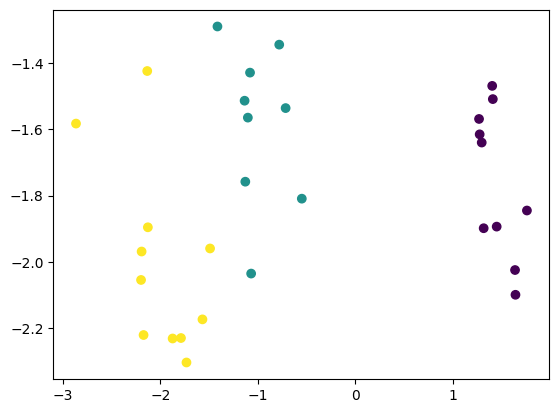

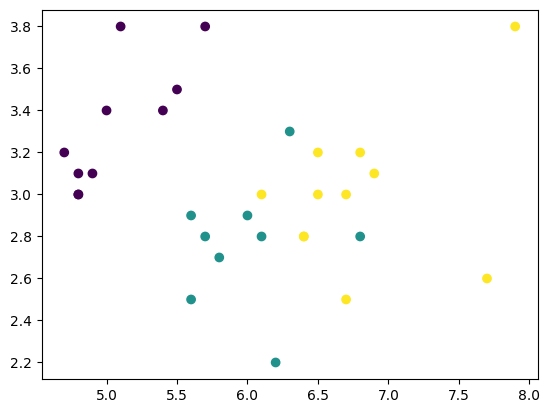

In [118]:
W = LDA_dimensionality(X_train_iris, y_train_iris, 2)
X_new = np.dot((X_test_iris), W)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y_test_iris)
plt.show()
plt.scatter(X_test_iris[:, 0], X_test_iris[:, 1], marker='o', c=y_test_iris)

<center><span style="font-weight:700;font-size:20px">Задание 3</span></center>

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, cross_val_score
from sklearn.preprocessing import scale

In [154]:
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

In [157]:
knn = KNeighborsClassifier()

In [184]:
#KFold
kfold_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    kfold_accs.append(cross_val_score(knn, X_wine, y_wine, cv=KFold(n_splits=5, random_state=42, shuffle=True), scoring='accuracy').mean())
print("Для Kfold")
print(f"Максимальная точность классификации: {max(kfold_accs)} при k = {kfold_accs.index(max(kfold_accs)) + 1}")

Для Kfold
Максимальная точность классификации: 0.9776190476190475 при k = 29


In [185]:
#LOO
loo_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    loo_accs.append(cross_val_score(knn, X_wine, y_wine, cv=LeaveOneOut(), scoring='accuracy').mean())
print("Для LOO")
print(f"Максимальная точность классификации: {max(loo_accs)} при k = {loo_accs.index(max(loo_accs)) + 1}")


Для LOO
Максимальная точность классификации: 0.9831460674157303 при k = 36


In [186]:
#SKFold
skfold_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    skfold_accs.append(cross_val_score(knn, X_wine, y_wine, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), scoring='accuracy').mean())
print("Для SKFold")
print(f"Максимальная точность классификации: {max(skfold_accs)} при k = {skfold_accs.index(max(skfold_accs)) + 1}")


Для SKFold
Максимальная точность классификации: 0.9776190476190475 при k = 13


Вне зависимости от выбора метода кросс-валидации, лучший результат достигается при количестве соседей, равном 1. Все же, при таком количестве соседей лучше всего себя показал метод LeaveOneOut с точностью 0.77

In [178]:
#масштабируем признаки
X_wine = scale(X_wine)

In [189]:
#KFold
kfold_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    kfold_accs.append(cross_val_score(knn, X_wine, y_wine, cv=KFold(n_splits=5, random_state=42, shuffle=True), scoring='accuracy').mean())
print("Для Kfold")
print(f"Максимальная точность классификации: {max(kfold_accs)} при k = {kfold_accs.index(max(kfold_accs)) + 1}")

Для Kfold
Максимальная точность классификации: 0.9776190476190475 при k = 29


In [188]:
#LOO
loo_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    loo_accs.append(cross_val_score(knn, X_wine, y_wine, cv=LeaveOneOut(), scoring='accuracy').mean())
print("Для LOO")
print(f"Максимальная точность классификации: {max(loo_accs)} при k = {loo_accs.index(max(loo_accs)) + 1}")


Для LOO
Максимальная точность классификации: 0.9831460674157303 при k = 36


In [190]:
#SKFold
skfold_accs = []
for k in range(1, 51):
    knn.n_neighbors = k
    skfold_accs.append(cross_val_score(knn, X_wine, y_wine, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), scoring='accuracy').mean())
print("Для SKFold")
print(f"Максимальная точность классификации: {max(skfold_accs)} при k = {skfold_accs.index(max(skfold_accs)) + 1}")

Для SKFold
Максимальная точность классификации: 0.9776190476190475 при k = 13


При масшабировании данных (нормализации), количество соседей для каждого метода изменилось. Для KFold - 29, для LeaveOneOut - 36, для StratifiedKFold - 13, также увеличилось качество классификации.Это происходит потому, что расстояние между признаками с большими значениями становятся не такими значимыми. Самая точная классификация происходит при примекнении способа кросс-валидации LeaveOneOut с 36 соседями и точность составляет 0.98

Метод кросс-валидации не изменился, что говорит о превосходстве метода LeaveOneOut для классификации методом k-ближних соседей в общем случае.